In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('C:/Users/DCL\Desktop\ML-20230831T022512Z-001\ML\Data\heart.csv')

In [3]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
d.shape

(303, 14)

In [5]:
d.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
X = d.drop('target', axis=1) #independent columns
y = d['target']   #target column i.e price range

In [8]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#apply SelectKBest class to extract top 10 best features
test = SelectKBest(score_func= f_classif)
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,age,16.116700
1,sex,25.792191
2,cp,69.772271
3,trestbps,6.458169
4,chol,2.202983
5,fbs,0.236942
6,restecg,5.777209
7,thalach,65.120104
8,exang,70.952438
9,oldpeak,68.551439


In [10]:
print(featureScores.nlargest(10,'Score'))

       Specs      Score
8      exang  70.952438
2         cp  69.772271
9    oldpeak  68.551439
7    thalach  65.120104
11        ca  54.559834
10     slope  40.902071
12      thal  40.407696
1        sex  25.792191
0        age  16.116700
3   trestbps   6.458169


In [11]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
X = d.iloc[:,:-1]
y = d.iloc[:,-1]

In [14]:
X_scaled = StandardScaler().fit_transform(X)

In [15]:
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
X_pca

,PC1,PC2
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156
...,...,...
298,1.146672,-0.519529
299,-0.708593,-1.045752
300,2.459005,0.478262
301,1.762755,-2.336816


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9354838709677419


In [21]:
finalDf = pd.concat([X_pca, d[['target']]], axis = 1)

In [22]:
X = finalDf.iloc[:,:-1]
y = finalDf.iloc[:,-1]

In [23]:
X_train.shape

(272, 2)

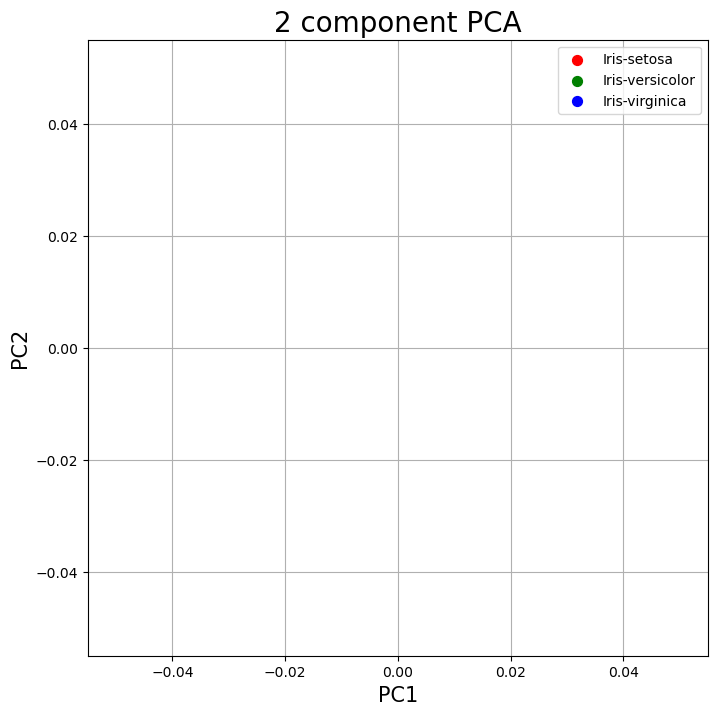

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
X = d.iloc[:,1:3]
y = d.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

print("Test data accuracy:",accuracy_score(y_test, y_pred))

Test data accuracy: 0.7049180327868853


In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [31]:
# K-Fold
logr1=LogisticRegression()
score=cross_val_score(logr1,X,y,cv=5)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

Cross Validation Scores are [0.68852459 0.67213115 0.70491803 0.76666667 0.61666667]
Average Cross Validation (Test data accuracy): 0.6897814207650274


In [32]:
#Stratified KFold is used for imbalanced data

logr2=LogisticRegression()
score=cross_val_score(logr2,X,y,cv= StratifiedKFold(5))

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

Cross Validation Scores are [0.68852459 0.67213115 0.70491803 0.76666667 0.61666667]
Average Cross Validation (Test data accuracy): 0.6897814207650274


In [33]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

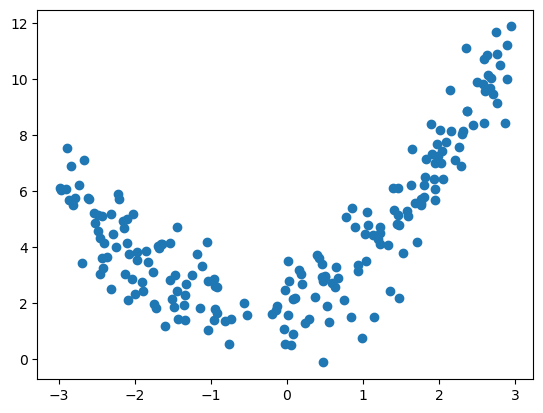

In [34]:
plt.scatter(X, y)
